In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sintegrate
import scipy.optimize as opt
import scipy.special as sp
%matplotlib inline

In [40]:
a = np.ones(2)
epsilon2 = 0

def podcalkowa(x, w, i, j):
    H_arg = np.sqrt(w) * x
    Hi = sp.hermite(i)(H_arg)
    Hj = sp.hermite(j)(H_arg)
    return np.exp(-H_arg**2) * x**2  * Hi * Hj

def calka(w, i, j):
    sigma = (2*w)**-0.5
    return sintegrate.quad(podcalkowa, -sigma, sigma, args=(w, i, j))

def skladnik(w, i, j, epsilon2):
    prawy_skladnik = w/(np.pi * 2**i * sp.factorial(i) *\
                        2**j * sp.factorial(j)) *\
                        (epsilon2 - w**2/2) * calka(w, i, j)[0]
    if i == j:
        prawy_skladnik += (j+0.5) * w
    prawy_skladnik *= a[i]*a[j]
    
    return prawy_skladnik

def suma(wektor, epsilon2):
    w = wektor[0]
    a = wektor[1:]
    wynik = 0.0
    for i in range(len(a)):
        for j in range(len(a)):
            wynik += skladnik(w, i, j, epsilon2)
    return wynik
print(opt.minimize(suma, np.array([1, *a]), args=(epsilon2,), bounds=((0.01, None), *[(None, None) for i in a] ))

SyntaxError: unexpected EOF while parsing (<ipython-input-40-ddbd7e925671>, line 30)

In [39]:
opt.minimize?

In [ ]:
[]

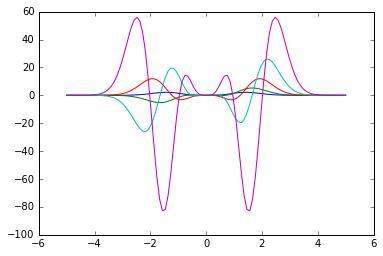

In [20]:
sintegrate.quad?
x = np.linspace(-5, 5, 100)
for i in range(1, 6):
    y = podcalkowa(x, 1, 1, i)
    plt.plot(x,y)


In [12]:
plt.show()